In [1]:
import islpy as isl
import matplotlib.pyplot as plt
from islplot_support import get_set_list, get_umap_list, plot_usets, plot_umaps
from latex_op import display_latex, print_latex

# Presburger Sets and Relations

## Presburger Set

In [2]:
uset = isl.UnionSet("{T[i,j] : 0 < i <= j < 10; S[i,j] : 0 < 2 * j  <  i <= 8}")
display_latex(uset)

<IPython.core.display.Math object>

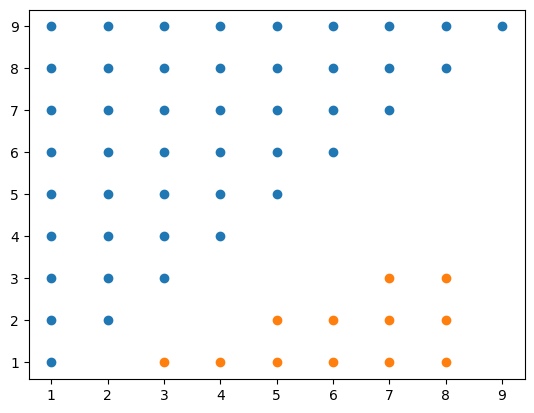

In [3]:
usets = get_set_list(uset)
plot_usets(usets)

## Presburger Map

In [4]:
umap = isl.UnionMap("{X[i,j] -> Y[i+3, 2 * j + 1]: 0 < i, j < 5}")
display_latex(umap)

<IPython.core.display.Math object>

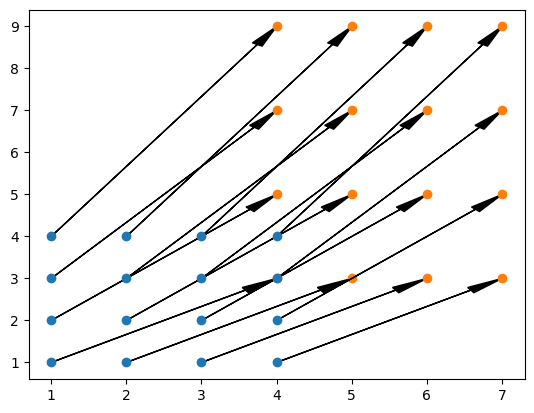

In [5]:
umaps = get_umap_list(umap)
plot_umaps(umaps)

# (Quasi) Affine Expressions

An affine expression is recursively constructed from the following elements

**Base**
- Constants (\\(c_i\\))
- Parameters (\\(p_i\\))
- Variables (\\(v_i\\))

**Operations**
- Unary negation \\( (-e) \\)
- Addition \\( ( e\_0 + e\_1 ) \\)
- Multiplication by a constant \\( (c * e) \\)
- Constant division \\( (e / c) \\)
- Constant remainder \\( (e \mod c) \\)

### Examples

#### Valid Expressions
- 42
- n, m
- i, j
- -i, 3 * i + 4
- i / 2, i % 3

#### Invalid Expressions
- i * n, n * m
- 5 / n, i % j



# Presburger Formula

A Presburger Formula is a boolean combination of comparisons between (Quasi) Affine Expressions.
It is recursively constructed from the following elements:

**Base**
- Boolean constants (&#8868;, &#8869;)

**Operations**
- Comparisions between quasi-affine expressions  
  $e0 \oplus e1, \oplus \in {<, \le, =, \ne, \ge, >}$
- Boolean operations between Presburger Formulas  
  $e0 \otimes e1, \otimes \in {\land, \lor, not, \Rightarrow, \Leftarrow, \Leftrightarrow}$
- Quantified variables  
  $\exists x: p(x, ...)$,
  $\forall x: p(x, ...)$
  
### Examples

#### Valid Expressions
- $1 < 0$
- $j + 3 \le 0 \land 0 \le n$

#### Invalid Expressions

- 42




# Presburger Sets

A Presburger Set S, is a set of integer vectors described by a Presburger formula.
It is formally described as a set 
$$
S = \{ \vec{v} \mid \vec{v} \in \mathbb{Z}^n : p (\vec{v}, \vec{p})\}
$$
where "p" is a Presburger Formular that evaluates to true, if a
tuple $\left(\vec{v}\right)$ is element of S.

## Basic Set

A Basic Set is the simplest form of a Presburger Set and allows only Presburger Formula
that describe a single convex (but possibly sparse) set.

The **space** of a set is defined by the dimensionality of the tuples it contains. A set containing pairs
is called a two-dimensional space. Spaces can be **named**, which means a name is written in front of each
tuple that allows to distinguish different spaces with identical dimensionality. 

### Examples
The following two basic sets **Triangle** and **Square** describe an upper-left triangle as well as a square.

Triangle: \\(\\{A[i,j] \mid 0 < i < j < 10\\}\\)  
Square: \\(\\{ A[i,j] \mid 5 < i < 10 \land 0 < j < 5 \\}\\)

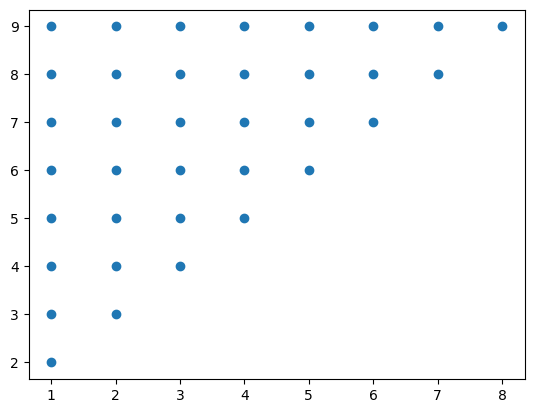

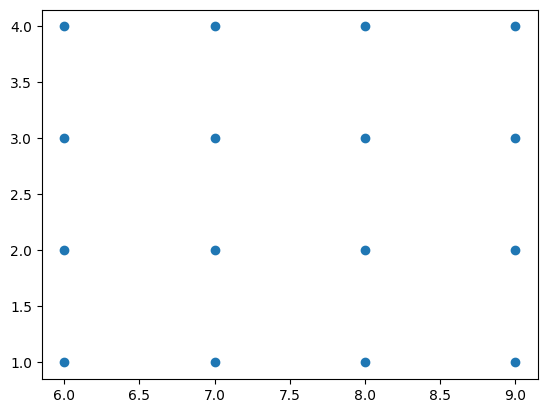

In [6]:
Triangle = isl.BasicSet("{A[i,j] : 0 < i < j < 10}")
Square = isl.BasicSet("{A[i,j] : 5 < i < 10 and 0 < j < 5}")
plot_usets(get_set_list(Triangle))
plot_usets(get_set_list(Square))

## Sparse Basic Sets

In case the Presburger Formula describing the Basic Set contains modulo constraints,
the set of points may become sparse.

### Example

The basic set **Sparse** is a square where certain diagonals are excluded.

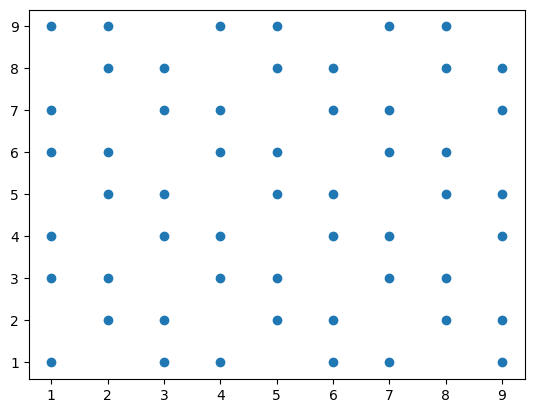

In [7]:
Sparse = isl.BasicSet("{A[i,j] : 0 < i,j < 10 and (i + j) % 3 != 0}")
plot_usets(get_set_list(Sparse))

## Exercises

a) Plot a set **UpperTriangle** with a base of width 7.
```
       x
     x x x
   x x x x x
 x x x x x x x
```

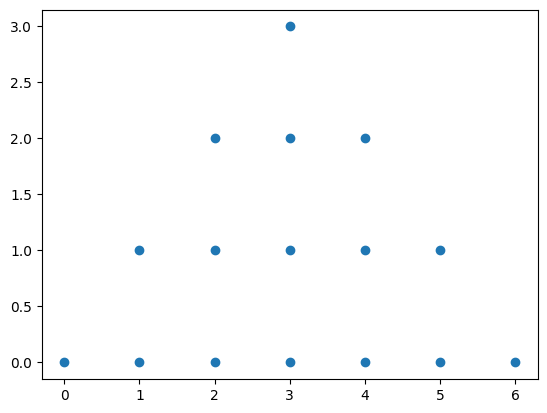

In [8]:
#!Solution
UpperTriangle = isl.BasicSet("{[i,j] : 0 <= j and i - j >= 0 and j + i <= 6}")
plot_usets(get_set_list(UpperTriangle))

### 
b) Plot a set **LowerTriangle** with a base of width 7
```
 x x x x x x x
   x x x x x
     x x x
       x
```

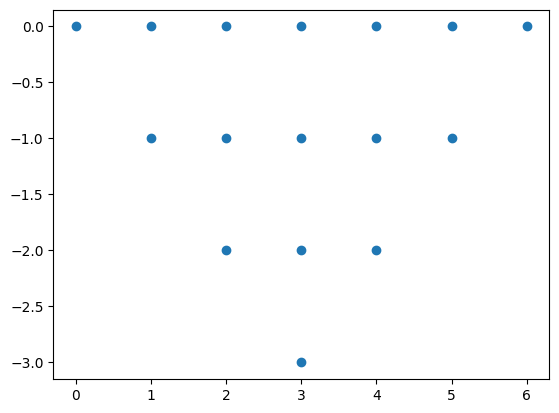

In [9]:
#!Solution
LowerTriangle = isl.BasicSet("{[i,j] : j <= 0 and i - j <= 6 and j + i >= 0}")
plot_usets(get_set_list(LowerTriangle))

### 
c) Plot a set **Diamond** with a width and height of 7.
```
       x
     x x x
   x x x x x
 x x x x x x x
   x x x x x
     x x x
       x
```

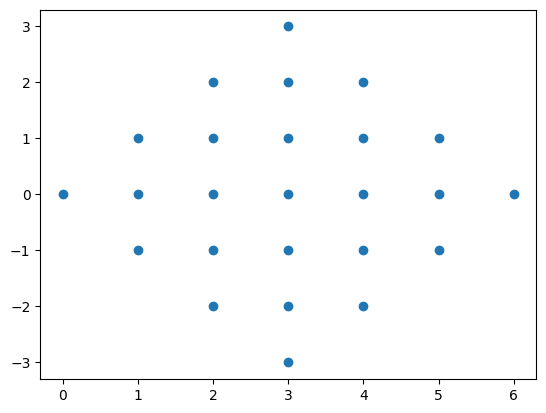

In [10]:
#!Solution
Diamond = isl.BasicSet("{[i,j] : i - j >= 0 and j + i <= 6 and i - j <= 6 and j + i >= 0}")
plot_usets(get_set_list(Diamond))

### 
d) Plot a  set **Parallelogram** with a height of 4 and a width of 7 with a slope of 1/2.

```
             x x x x x x x
         x x x x x x x
     x x x x x x x
 x x x x x x x
```

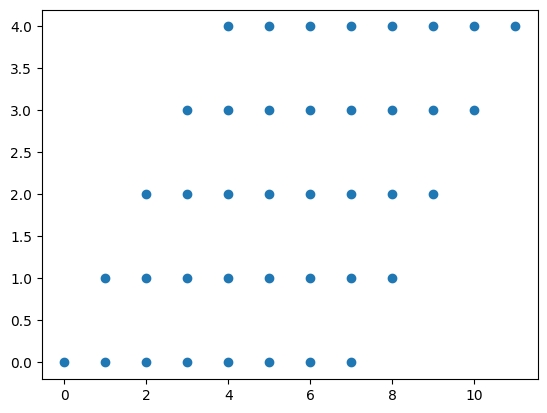

In [11]:
#!Solution
Parallelogram = isl.BasicSet("{[i,j] : 0 <= j <= 4 and i - j >= 0 and i - j <= 7 }")
plot_usets(get_set_list(Parallelogram))

# Sets

A set is a finite union of basic sets that all belong to the same named space. This means all
basic sets have identical dimensionality and carry the same name.


Combined: { A[i, j] : i > 0 and j <= 9 and (j > i or (6 <= i <= 9 and 0 < j <= 4)) }


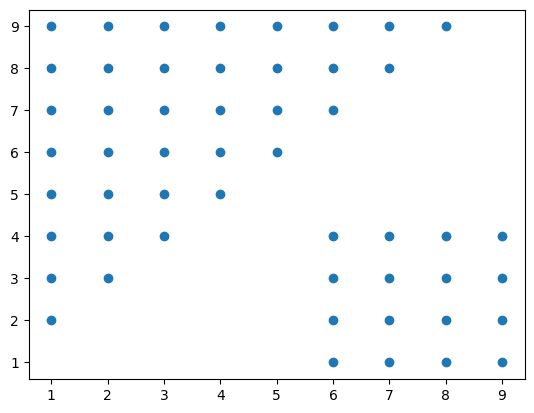

In [12]:
Combined = Triangle.union(Square)
print("Combined: " + str(Combined))
plot_usets(get_set_list(Combined))

# Union Set

A union set is a finite union of sets that belong to differently named spaces.

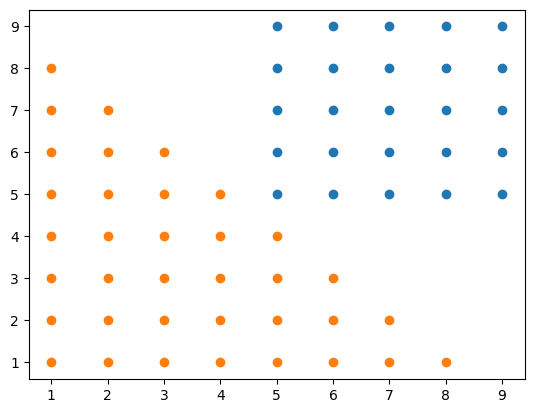

In [13]:
u = isl.UnionSet("{A[i,j] : 0 < i,j and  j + i < 10; B[i,j] : 5 <= i,j < 10 }")
plot_usets(get_set_list(u))

# Presburger Relations

A Presburger Map M, is a set of tuples of integer vectors described by a Presburger formula.
It is formally described as a map 
$$
M = \{ \vec{v_1} \to \vec{v_2} \mid \vec{v_1}, \vec{v_2} \in \mathbb{Z}^n : p \left(\vec{v_1}, \vec{v_2}, \vec{p}\right)\}
$$
where "p" is a Presburger Formular that evaluates to true, if the pair of tuples 
$\left(\vec{v_1}\right)$ and $\left(\vec{v_2}\right)$ is element of M.


## Basic Map

A basic map relates two basic sets. The relations are simple enough to be described with a union of affine
inequalities (and modulo constraints).

### Example

A simple relation that translates a basic set **A** to position **X**.

Translate = $\{A[i,j] \to X[i+10,j+1]\}$

To visualize this set, we use it to translate the earlier defined set **Triangle**. Without constraining
**Translate** to **Triangle** the map is infinite and cannot be rendered.

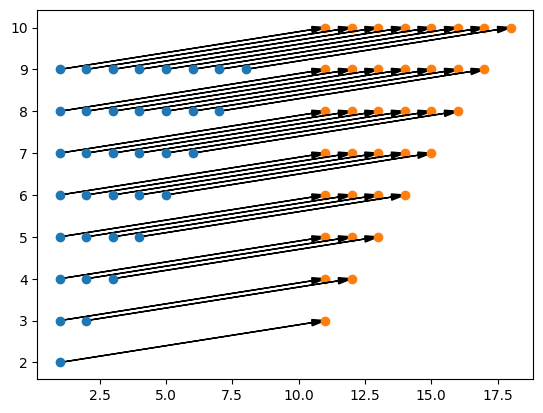

In [14]:
Translate = isl.BasicMap("{A[i,j] -> X[i+10,j+1]}")
Translate = Translate.intersect_domain(Triangle)
plot_umaps(get_umap_list(Translate))